### Python for Statistics: 

### Pregnancy, Fantasy Football, and Trump Twitter Case Studies

Lauren Shareshian

Oregon Episcopal School

Portland, OR


### What's the easiest way to get Python?

- Python and a Jupyter Notebook
- Locally: 
    - Anaconda 3.6, www.anaconda.com/download/
- Web-based: 
    - Cocalc, www.cocalc.com

### To temporarily play with this file:

www.cocalc.com

Sign in

Email: oescompsci#@go.oes.edu (replace # with a number between 1 and 20)

Password: exeter

CWICS - Python for Statistics


### Important Python Packages for Statistics
- matplotlib (plotting)
- pandas (Excel spreadsheets)
- NumPy (arrays, math functions, linear algebra)
- SciPy  (lots of stuff including stats)
- StatsModels (stats, most similar to R)
- SkLearn (stats + machine learning)
- Patsy (for using R syntax in Python)

Let's import all the packages that we'll need all at once:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<img src="images/cwic2.png" style="width: 300px;"/>

The National Survey of Family Growth (NSFG) gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and general and reproductive health. 

Its 2002 pregnancy dataset contains 13593 respondents and 244 attributes.

https://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm

How do I open the file?

index_col = 0 denotes that I want the first column treated as the row labels.

In [61]:
preg = pd.read_csv('2002FemPreg.csv', index_col = 0)

How do I view the first few rows of the data?

In [62]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


How do I know what the attributes are?

In [63]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

How do I know how big the dataset is?

In [64]:
preg.shape

(13593, 244)

One of the variables is pregnancy outcome, i.e., if the baby is carried to term or not (no miscarriages or still births). Let's limit our calculations below to live births:

In [65]:
live = preg[preg.outcome == 1]
live.shape

(9148, 244)

This is a huge dataset. What if there is missing data? Let's limit our focus to rows where the mother's age and the baby's weight are nonempty.

In [69]:
live = live.dropna(subset=['agepreg', 'birthwgt_lb'])

What are some descriptive stats for baby weight?

In [66]:
live['birthwgt_lb'].describe()

count    9084.000000
mean        6.832122
std         1.411447
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        15.000000
Name: birthwgt_lb, dtype: float64

A frequency chart for baby weight:

In [67]:
live['birthwgt_lb'].value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

What does a histogram of the data look like?

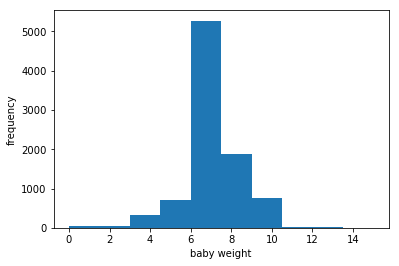

In [70]:
plt.hist(live['birthwgt_lb']);
plt.xlabel('baby weight');
plt.ylabel('frequency');

With a few extra arguments, we can make the plot prettier.

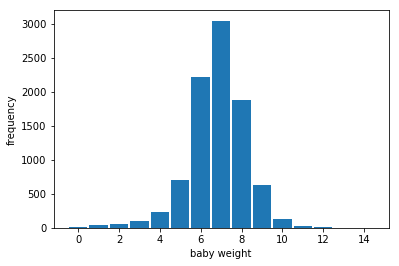

In [71]:
plt.hist(live['birthwgt_lb'],rwidth=.9, bins=np.arange(-0.5,15.5,1));
plt.xlabel('baby weight');
plt.ylabel('frequency');

### Question 1: Do firstborns weigh less than later children?

Let's save firstborns and later siblings into different variables based on birth order:

In [72]:
firsts = live[live.birthord == 1].birthwgt_lb
others = live[live.birthord != 1].birthwgt_lb

What is the mean birth weight of each?

In [73]:
print(firsts.mean(), others.mean())

6.752968036529681 6.905824829931973


Hmm. It looks like others may weigh a bit more than first borns. Let's make a comparative histogram:

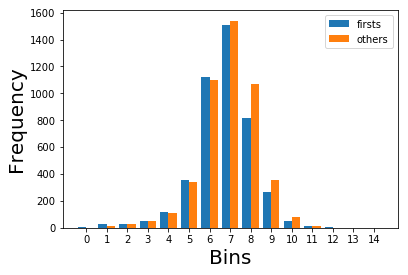

In [74]:
plt.hist([firsts, others], bins = np.arange(-.5, 15.5, 1),label=['firsts', 'others']);
plt.xlabel('Bins', size=20);
plt.ylabel('Frequency', size=20);
plt.xticks(np.arange(0,15,1));
plt.legend();

You can use a two-sample t-test to conclude whether the difference between firstborn and later siblings' weights are actually statistically significant. You can find more statistical tests than you will probably ever need in the Python scipy package.

In [75]:
zscore, pvalue = ttest_ind(firsts, others)
print('pvalue', pvalue)
print('zscore', zscore)

pvalue 2.456175491391312e-07
zscore -5.164941440079655


The p-value is so small that we conclude that there is a statistically significant difference between firstborn weights and later baby weights.

### Question 2: Do Older Moms Have Heavier Babies?

Let's save the mother ages as mother_ages and the baby weights as baby_weights for ease of working with them:

In [76]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
mother_ages = live['agepreg']
baby_weights = live['totalwgt_lb']

How old were the oldest and youngest mothers?

In [77]:
mother_ages.describe()

count    9038.000000
mean       24.936129
std         5.553985
min        10.830000
25%        20.500000
50%        24.330000
75%        28.890000
max        44.080000
Name: agepreg, dtype: float64

What does a scatterplot of mother's age vs baby's weight look like?

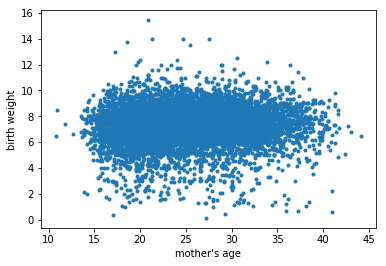

In [78]:
plt.plot(mother_ages, baby_weights,'.');
plt.xlabel("mother's age");
plt.ylabel("birth weight");

Sometimes it helps to play around with opacity in order to see more tightly clustered points:

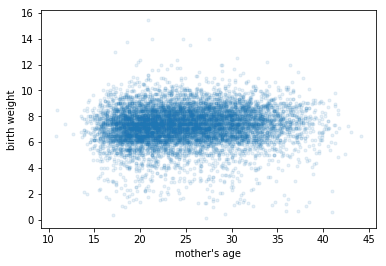

In [79]:
plt.plot(mother_ages, baby_weights,'.',alpha = 0.1);
plt.xlabel("mother's age");
plt.ylabel("birth weight");

What if you want to calculate a linear regression line?

In [80]:
m, b = np.polyfit(mother_ages, baby_weights, 1)
print('slope', m)
print('y-int', b)

slope 0.0174538514718031
y-int 6.830396973311044


To superimpose the line of best fit on the scatterplot:

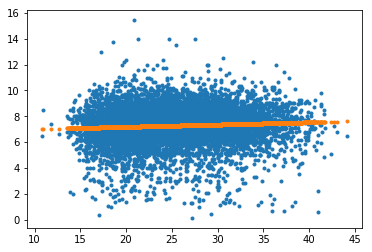

In [81]:
fit = np.polyfit(mother_ages, baby_weights,1);
fit_fn = np.poly1d(fit); 
plt.plot(mother_ages, baby_weights,'.'); #observed points
plt.plot(mother_ages, fit_fn(mother_ages),'.'); #predicted points

We can run a linear least-squares regression test:

In [82]:
linregress(mother_ages, baby_weights)

LinregressResult(slope=0.017453851471802756, intercept=6.8303969733110526, rvalue=0.06883397035410907, pvalue=5.7229471073149065e-11, stderr=0.0026611480116264753)

But wait, how can the p-value AND correlation coefficent both be so tiny?

https://www.researchgate.net/post/What_is_the_relationship_between_R-squared_and_p-value_in_a_regression


"Low r-squared and low p-value means that your model doesn't explain much of the variation of the data but it is still significant (better than not having a model)"

"With enough power, R-squared values very close to zero can be statistically significant, but that doesn't mean they have practical significance. It is a statistical artifact. So, plot the data, see if there is linear trend in the plot, analyze the residuals (points off the line) to see if underlying assumptions are met, and if so, then determine that the fit is good."

Another package that has cleaner user printouts is StatsModels:

In [85]:
X = mother_ages.values
Y = baby_weights.values
X = sm.add_constant(X) #An intercept is not included by default and should be added by the user - kinda annoying
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.72e-11
Time:                        12:05:27   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8304      0.068    100.470      0.000       6.697       6.964
x1             0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Completely Unrelated Question:

How well does ESPN do at predicting how well players will perform in fantasy football?


Two datasets

 - ESPN predictions before the 2017 season:
 
 http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200
 
 - Actual ESPN fantasy results for 2017-2018 season:
 
 http://games.espn.com/ffl/leaders

Note: Python can pull this data DIRECTLY OFF OF THE WEBSITE in one line!

In [86]:
table = pd.read_html('http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200')[1]
table.head()

,Player/Position/Team,PosRank,Bye,MB,MC,TC,EK,FY,AVG
0,"1. David Johnson, RB, ARI",RB1,8,1,1,3,1,2,1.6
1,"2. Le'Veon Bell, RB, PIT",RB2,9,2,2,2,2,1,1.8
2,"3. Antonio Brown, WR, PIT",WR1,9,3,4,1,4,3,3.0
3,"4. Ezekiel Elliott, RB, DAL",RB3,6,8,3,5,3,4,4.6
4,"5. Odell Beckham Jr., WR, NYG",WR2,8,5,6,7,5,5,5.6


Let's read in a merged dataset of projections and performance.

In [87]:
df = pd.read_csv('football.csv', index_col=0)
df.head()

,player,positions,2017 points,2017 projected ranking
0,"Russell Wilson, SEA",QB,347.9,79
1,"Le'Veon Bell, PIT",RB,341.6,2
2,"Alvin Kamara, NO",RB,320.4,152
3,"Antonio Brown, PIT",WR,310.3,3
6,"Tom Brady, NE",QB,295.9,44


Let's save rankings and points as variables for ease of use:

In [88]:
projection = df['2017 projected ranking']
performance = df['2017 points']

Let's plot ranking versus points scored.

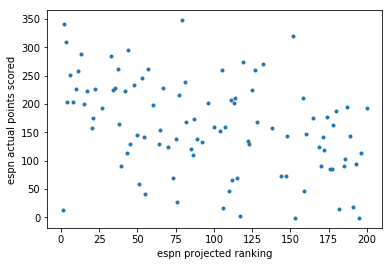

In [89]:
plt.plot(projection, performance, '.');
plt.xlabel('espn projected ranking');
plt.ylabel('espn actual points scored');

We can superimpose the line of best fit:

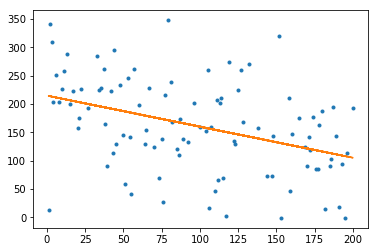

In [90]:
fit = np.polyfit(projection, performance, 1);
fit_fn = np.poly1d(fit); 
plt.plot(projection, performance,'.', projection, fit_fn(projection));

We can add another column in the results dataframe called "predicted points" that lists the predicted points from the line of best fit for each player.

In [91]:
df['predicted points'] = fit_fn(projection)
df.head()

,player,positions,2017 points,2017 projected ranking,predicted points
0,"Russell Wilson, SEA",QB,347.9,79,171.640066
1,"Le'Veon Bell, PIT",RB,341.6,2,213.812187
2,"Alvin Kamara, NO",RB,320.4,152,131.658704
3,"Antonio Brown, PIT",WR,310.3,3,213.264497
6,"Tom Brady, NE",QB,295.9,44,190.809212


We can create another column called "residual" that lists the difference between the actual 2017 points and the predicted ESPN points.

In [92]:
df['residual'] = df['2017 points'] - df['predicted points']
df.head()

,player,positions,2017 points,2017 projected ranking,predicted points,residual
0,"Russell Wilson, SEA",QB,347.9,79,171.640066,176.259934
1,"Le'Veon Bell, PIT",RB,341.6,2,213.812187,127.787813
2,"Alvin Kamara, NO",RB,320.4,152,131.658704,188.741296
3,"Antonio Brown, PIT",WR,310.3,3,213.264497,97.035503
6,"Tom Brady, NE",QB,295.9,44,190.809212,105.090788


We can view a residual plot:

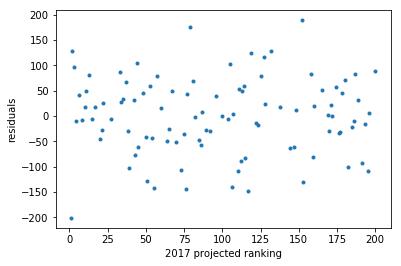

In [96]:
plt.plot(df['2017 projected ranking'], df['residual'],'.');
plt.xlabel('2017 projected ranking');
plt.ylabel('residuals');

We can sort the dataframe by residuals from lowest to highest to see the most overrated players.

In [95]:
df.sort_values(by = 'residual', ascending = False).head()

,player,positions,2017 points,2017 projected ranking,predicted points,residual
2,"Alvin Kamara, NO",RB,320.4,152,131.658704,188.741296
0,"Russell Wilson, SEA",QB,347.9,79,171.640066,176.259934
1,"Le'Veon Bell, PIT",RB,341.6,2,213.812187,127.787813
13,"Philip Rivers, LAC",QB,270.4,132,142.612502,127.787498
12,"Matthew Stafford, DET",QB,273.6,119,149.732470,123.867530


R-squared is a measure of how well your model fits your data. 

In [97]:
X = df['2017 projected ranking']
Y = df['2017 points']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2017 points   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     18.20
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           4.66e-05
Time:                        12:12:12   Log-Likelihood:                -561.76
No. Observations:                  98   AIC:                             1128.
Df Residuals:                      96   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    214.9076     14.624     14.696      0.000     185.879     243.936
2017 projected ranking    -0.5477      0.128     -4.266      0.000      -0.803      -0.293
==============================================================================
Omnibus:                        0.342   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.316
Skew:                          -0.133   Prob(JB):                        0.854
Kurtosis:                       2.916   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

15.9% of the variation in fantasy points scored can be attributed to variation in ESPN projected ranking. Let's see if we can do better by adding another variable: position.

To perform a linear regression when there are categorical variables involved, you need to first create a matrix (called a one-hot matrix) where each position corresponds to a different column in the matrix. For example, if a player is a QB, he'll have a 1 in the QB column and a 0 in all of the others. 

In [98]:
input_data = df[['2017 projected ranking','positions']]
one_hot = pd.get_dummies(df['positions'])
input_data = input_data.drop('positions', axis = 1)
input_data = input_data.join(one_hot)
input_data.head()

,2017 projected ranking,QB,RB,TE,WR
0,79,1,0,0,0
1,2,0,1,0,0
2,152,0,1,0,0
3,3,0,0,0,1
6,44,1,0,0,0


We can now calculate our new R squared:

In [99]:
X = input_data
y = df['2017 points']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2017 points   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     13.12
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.63e-08
Time:                        12:13:42   Log-Likelihood:                -548.34
No. Observations:                  98   AIC:                             1107.
Df Residuals:                      93   BIC:                             1120.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    186.3323     11.243     16.574      0.000     164.007     208.658
2017 projected ranking    -0.6086      0.114     -5.319      0.000      -0.836      -0.381
QB                       109.9800     15.197      7.237      0.000      79.801     140.159
RB                        -1.3246     10.842     -0.122      0.903     -22.856      20.206
TE                        40.4493     18.659      2.168      0.033       3.396      77.502
WR                        37.2276     10.725      3.471      0.001      15.930      58.525
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.895
Skew:                          -0.032   Prob(JB):                       0.0865
Kurtosis:                       4.093   Cond. No.                     1.35e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R-squared more than doubled when we added in the additional variable of position! Or, we can create a multiple regression model:

In [100]:
X = input_data
y = df['2017 points']

model = LinearRegression()
model.fit(X, y)
print('R-squared', model.score(X,y))

R-squared 0.36078149047291974


We can superimpose our predictions over the observed points:

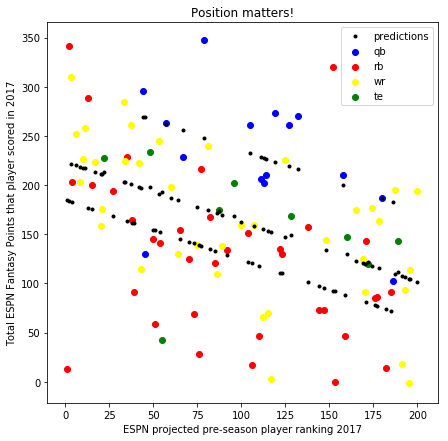

In [101]:
quarterbacks = df[df['positions'] == 'QB']
runningbacks = df[df['positions'] == 'RB']
receivers = df[df['positions'] == 'WR']
tightends = df[df['positions'] == 'TE']

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(quarterbacks['2017 projected ranking'], quarterbacks['2017 points'],  color='blue', label='qb')
ax.scatter(runningbacks['2017 projected ranking'], runningbacks['2017 points'],  color='red', label='rb')
ax.scatter(receivers['2017 projected ranking'], receivers['2017 points'],  color='yellow', label = 'wr')
ax.scatter(tightends['2017 projected ranking'], tightends['2017 points'],  color='green', label = 'te')

ax.plot(X['2017 projected ranking'].values, model.predict(X), 'k.', label = 'predictions')
ax.set_xlabel('ESPN projected pre-season player ranking 2017')
ax.set_ylabel('Total ESPN Fantasy Points that player scored in 2017')
ax.set_title('Position matters!')
ax.legend(loc='best')

<img src="images/cwic3.png" style="width: 550px;"/>

### Totally unrelated question: 
What hours and days does Trump tweet most often?

Using a Python package called Tweepy, you can easily pull information off of the Twitter API. All you need to do is go to Twitter to get four special passwords called the consumer key, consumer secret, access token, and access token secret from  https://apps.twitter.com/.

In [47]:
consumer_key = 'srHcccePX0asW8OTRWS2iZ0u6'
consumer_secret = 'bF6sKeBdqpVeAX85Z1r9wyvDlcL8FLqbvmg7SM4cE1sJzFR6eh'
access_token = "847880217586683904-OK8dH7IVb41BoQ6JVg7jVjObB2hv4qa"
access_token_secret = "IhDGz8FRYKkfzY5FyrdXrKRmEKv5kMYZIQ2LRLV8Gwa1r" 


What was his most recent tweet?

In [103]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
user = api.get_user('realDonaldTrump')

print(user.status.text)

AMERICA IS OPEN FOR BUSINESS! 
https://t.co/fuRF2Z6CZl


Let's read in a file of his last several years' worth of tweets:

In [104]:
import datetime
import pytz
from dateutil.parser import parse
import pandas as pd

df = pd.read_csv('donald_tweets.csv', index_col = 0)
created_at = df['created_at']
text = df['text']
retweets = df['retweets']

#change from utc to eastern time zone
utc = pytz.timezone('UTC')
eastern = pytz.timezone('US/Eastern')
created_at = pd.to_datetime(created_at)
utc_dates = [utc.localize(time) for time in created_at]
dates = [time.astimezone(eastern) for time in utc_dates]

Now we can make a histogram of his tweet times:

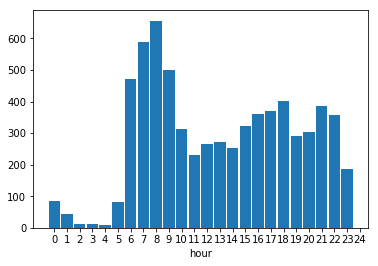

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

hours = [date.hour for date in dates]


plt.hist(hours, rwidth=0.9, bins = np.arange(-.5,24.5,1))
plt.xlabel('hour')
plt.xticks(np.arange(0,25,1));

Which hour does he tweet at most often? How many tweets did he have at 3 am?

In [106]:
from collections import Counter
freq = Counter(hours)
print(freq.most_common)

<bound method Counter.most_common of Counter({8: 656, 7: 587, 9: 499, 6: 470, 18: 401, 21: 386, 17: 369, 16: 361, 22: 357, 15: 323, 10: 314, 20: 302, 19: 292, 13: 273, 12: 266, 14: 254, 11: 230, 23: 187, 0: 85, 5: 81, 1: 45, 2: 13, 3: 12, 4: 8})>


We can also plot the days of the week that he tweets:

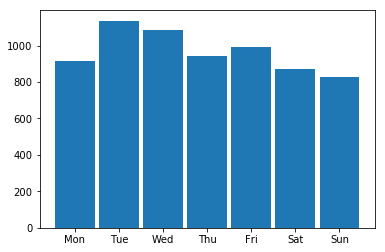

In [107]:
days = [date.weekday() for date in dates]

plt.hist(days, rwidth=0.9, bins = np.arange(-.5,7.5,1))
plt.xticks(np.arange(0,7,1),['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

On which date did he tweet the most and how many tweets did he tweet?

In [108]:
from collections import Counter

dates = [date.date() for date in dates]

freq = Counter(dates)
print(freq.most_common(1))

[(datetime.date(2016, 10, 19), 83)]


Let's view his tweeting habits over time:

<Container object of 809 artists>

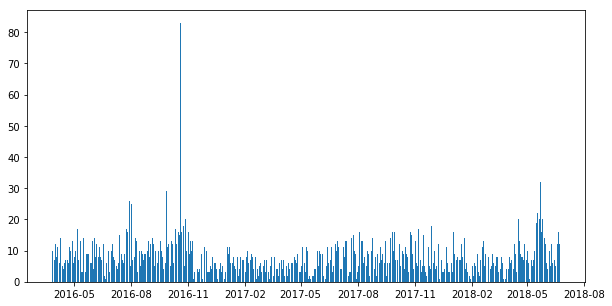

In [109]:
count_days={}
for day in dates:
    if day not in count_days:
        count_days[day]=1
    else:
        count_days[day]+=1
plt.rcParams['figure.figsize'] = [10,5]
plt.bar(list(count_days.keys()), count_days.values())

What were the maximum amount of retweets for one of his tweets?

In [110]:
max(retweets)

369110

What did this tweet say?

In [111]:
text[np.argmax(retweets)]

'#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg'

### Creating a Donald Trump Chatbot

Now let's make a Donald Trump chatbot that uses his previous tweets to create new tweets. Let's make one long string that contains all of his tweets in lowercase format:

In [112]:
all_tweets = ''
for tweet in text:
    all_tweets = all_tweets + tweet
    
all_tweets = all_tweets.lower()

print(all_tweets[0:500])

rt @mitchellvii: trump always ends up being right.  it's almost a little freaky.rt @mitchellvii: exactly as i said - house intel chair: we cannot rule out sr. obama officials were involved in trump surveillance https://…big day for healthcare. working hard!today on #nationalagday, we honor our great american farmers &amp; ranchers. their hard work &amp; dedication are ingrained… https://t.co/ipgrhly2zjhonored to sign s.442 today. with this legislation, we support @nasa's scientists, engineers, a


We'll get rid of some punctuation and split the long tweet into a list of words.

In [113]:
import re


all_tweets = re.sub(r"http\S+", "", all_tweets) #remove hyperlinks
all_tweets = re.sub(r"amp\S+", "", all_tweets) #remove ampersand symbol
all_tweets = re.sub(r"\t", "", all_tweets)  # remove tabs
all_tweets = re.sub(r"\v", "", all_tweets)  # remove vertical space
all_tweets = re.sub(r"\r", "", all_tweets)  # remove carriage return
all_tweets = re.sub(r"\n", "", all_tweets)  # remove new lines
all_tweets = re.sub(r"\(", "", all_tweets)  # remove parenthesis
all_tweets = re.sub(r"\)", "", all_tweets)  # remove parenthesis
all_tweets = re.sub(r"\.\.\.", "", all_tweets)  # remove ...
all_tweets = re.sub(r"\. \. \. ", "", all_tweets)  # remove . . .
all_tweets = re.sub(r"\"", "", all_tweets)  # remove quotations
all_tweets = re.sub(r"!", "! ", all_tweets)  # insert space after !
all_tweets = re.sub(r"\.", ". ", all_tweets)  # insert space after .
all_tweets = re.sub(r"\?", "? ", all_tweets)  # insert space after ?

words = all_tweets.split()
bad_words = ['…', '.', '!', '?', ',']
words = [x for x in words if x not in bad_words]


We'll make the chatbot using Markov chains. A Markov chain is a randomly determined model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. What does this mean?

We'll make a key-value dictionary where each key is a two word phrase and each value is a list containing all the possible single words that come after that phrase. Here's a concrete example. Read it carefully, paying special attention to the "and i" phrase.


"hi my name is Al and i live in a box that i like very much and i can live in there as long as i want"

"hi my" -> ["name"]

"my name" -> ["is"]

"name is" -> ["Al"]

"is Al" -> ["and"]

"Al and" -> ["i"]

"and i" -> ["live"]

........

"and i" -> ["live", "can"]

In [114]:
#create dictionary by generating key/value pairs of phrases of a given length and the words that follow those phrases
word_dict=dict()
num_of_words = 2  # create phrases of length 2

for i in range(len(words)-num_of_words):
    phrase = ' '.join([words[j] for j in range(i, i+num_of_words)])
    if phrase not in word_dict:
        word_dict[phrase]=[words[i+num_of_words]]
    else:
        word_dict[phrase] = word_dict[phrase]+[words[i+num_of_words]]

Now randomly choose a key (two word phrase) to start with and then randomly choose the next word to follow it. While the new tweet is less than 140 characters, create a loop that continues to add new words to the new_tweet string by generating a new next word that follows the last starting_phrase. 

In [115]:
import random
#pick a random key value to start with
starting_phrase = random.choice(list(word_dict.keys()))
next_word = random.choice(word_dict[starting_phrase])
new_tweet = ' '.join([starting_phrase, next_word])

starting_phrase = starting_phrase.split()[1] + ' ' + next_word

while len(new_tweet) <= 140: #get approximately 140 characters
    try:
        next_word = random.choice(word_dict[starting_phrase])
        new_tweet = ' '.join([new_tweet, next_word])
        starting_phrase = starting_phrase.split()[1] + ' ' + next_word
    except:
        if new_tweet[-1] not in string.punctuation: #if we run out of pairs but it isn't the end of a line, make it the end of a sentence.
            new_tweet = ''.join([new_tweet, '.'])
            starting_phrase = random.choice(list(word_dict.keys())) #generate a new phrase to start a new sentence
            new_tweet = ' '.join([new_tweet, starting_phrase.capitalize()])
print(new_tweet.capitalize())

Consequence, is wrong! there will be a great day in colorado shortly after i entered the race for dnc chairman was, of course, totally rigged.


Resources
- Think Stats 2e & Think Python 2e, Allen B. Downey
http://greenteapress.com/wp/think-stats-2e/
- UC Berkeley Data Science course materials:
http://www.data8.org
- Python For Everyone, Charles Severance:
https://www.py4e.com/html3/
- My course materials:
https://github.com/laurenshareshian/Python_For_Math_Teachers
https://github.com/laurenshareshian/Python_Course_Lessons

